# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Understanding the information 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, it is important we understand the different relationships between the value to model (output) and the information we will use to predict (inputs). 

How many inputs we can have? This is a good question. The answer is as many as the modeler ingenuity can generate. To give you an example with this data. The Landsat satellite has 7 spectral bands (red, green, blue, near infrared, sortwave band 1, shortwave band 2, and thermal). SO far, 7 potential inputs. Now, in remote sensing we have a concept called "vegetation indices" that is an algebraic combination of certain bands that "enhance" certain conditions of the ground (vegetation health/occurrence, soil condition/ocurrence, water occurrence/temperature/sedimentation, etc). Some of these indices may have a direct relationship with soil moisture, but other we, as human, may not recognize as important input. So, going back to the question again, 

In this case, we are going to use the Relevance Vector Machine algorithm. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different of more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advantage of classical machine learning is the need of much less information than deep learning algorithms.

Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv files generated in Step 1:

In [13]:
import pandas as pd
sm_data_may_13 = pd.read_csv('./Results Step 1/landsat7_may_13_sm_pixels.csv')
sm_data_may_13.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.048572,0.08149,0.067767,0.389078,0.202627,0.100602,0.409,NaN,299.068168,0.948,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.051515,0.08468,0.073432,0.385447,0.209448,0.104040,0.409,NaN,299.368954,0.948,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.063257,0.09733,0.079070,0.370955,0.199245,0.100630,0.410,NaN,299.871403,0.948,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [14]:
import pandas as pd
sm_data_may_29 = pd.read_csv('./Results Step 1/landsat7_may_29_sm_pixels.csv')
sm_data_may_29.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.026270,0.060452,0.041615,0.495613,0.184972,0.078493,0.246,NaN,301.371914,0.9356,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.031633,0.063340,0.046840,0.464400,0.194900,0.091940,0.246,NaN,301.966649,0.9356,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [15]:
import pandas as pd
sm_data_jun_14 = pd.read_csv('./Results Step 1/landsat7_jun_14_sm_pixels.csv')
sm_data_jun_14.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.093728,0.131678,0.143365,0.372000,0.311720,0.189702,0.016,NaN,313.834015,0.8703,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.093728,0.136958,0.150625,0.368590,0.318182,0.199575,0.016,NaN,314.127964,0.8703,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.062817,0.094552,0.099832,0.334628,0.169793,0.104205,0.016,NaN,305.600004,0.8701,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [16]:
import pandas as pd
sm_data_jun_30 = pd.read_csv('./Results Step 1/landsat7_jun_30_sm_pixels.csv')
sm_data_jun_30.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.073350,0.113308,0.119632,0.392927,0.270855,0.150487,0.01,NaN,310.956042,0.9354,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.073350,0.115947,0.119632,0.392927,0.267637,0.150487,0.01,NaN,311.232901,0.9354,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.078107,0.123922,0.165612,0.321510,0.225535,0.147215,0.01,NaN,316.089908,0.9355,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


let's check column names:

In [17]:
print(sorted(sm_data_jun_30))

['AFRI1600', 'AFRI2100', 'ARVI', 'ATSAVI', 'AVI', 'BCC', 'BNDVI', 'BWDRVI', 'CIG', 'CROP', 'CVI', 'DVI', 'DVIplus', 'EVI', 'EVI2', 'ExG', 'ExGR', 'ExR', 'FCVI', 'FIELD', 'GARI', 'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GNDVI', 'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI', 'IKAW', 'IPVI', 'MCARI1', 'MCARI2', 'MGRVI', 'MNDVI', 'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MTVI1', 'MTVI2', 'NDDI', 'NDGI', 'NDII', 'NDMI', 'NDPI', 'NDVI', 'NDYI', 'NGRDI', 'NIRv', 'NIRvH2', 'NLI', 'NMDI', 'NRFIg', 'NRFIr', 'NormG', 'NormNIR', 'NormR', 'OCVI', 'OSAVI', 'QA_PIXEL', 'QA_RADSAT', 'RCC', 'RDVI', 'RGBVI', 'RGRI', 'RI', 'SA0513', 'SA0529', 'SA0614', 'SA0630', 'SARVI', 'SAVI', 'SAVI2', 'SI', 'SM0513', 'SM0529', 'SM0614', 'SM0630', 'SR', 'SR2', 'SR_ATMOS_OPACITY', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'SR_CLOUD_QA', 'ST_ATRAN', 'ST_B6', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'T0513', 'T0529', 'T0614', 'T0630', 'TDVI', 'TGI', 'TSAVI', 'TVI', 'TriV

Let's extract the inputs (bands and vegetation indices) and outputs (soil moisture)

In [20]:
bands=['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','ST_B6','SR_B7']
vegetation=['BNDVI','CIG','CVI','EVI','EVI2','GARI','GBNDVI','GEMI','GLI','GNDVI','GRNDVI','GVMI','MNDVI','NDVI','NGRDI','SAVI','VARI'
]
burn =['BAI','NBR','CSIT','NBRT','NDVIT','SAVIT']
water=['MNDWI','NDWI']
snow=['NDSI']
drought=['NDDI']
kernel=['kEVI','kNDVI','kRVI','kVARI']


In [24]:
# bands+ vegetation+burn+water+snow+drought+kernel
landsat7_may_13_sm_pixels=sm_data_may_13[bands+ vegetation+['SM0513']]
landsat7_may_29_sm_pixels=sm_data_may_29[bands+ vegetation+['SM0529']]
landsat7_jun_14_sm_pixels=sm_data_jun_14[bands+ vegetation+['SM0614']]
landsat7_jun_30_sm_pixels=sm_data_jun_30[bands+ vegetation+['SM0630']]


landsat7_may_29_sm_pixels.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,BNDVI,CIG,CVI,...,GLI,GNDVI,GRNDVI,GVMI,MNDVI,NDVI,NGRDI,SAVI,VARI,SM0529
0,0.026270,0.060452,0.041615,0.495613,0.184972,301.371914,0.078493,0.899326,7.198379,5.643696,...,0.280841,0.782570,0.658454,0.716203,0.726557,0.845075,0.184559,0.590671,0.248524,0.14
1,0.031633,0.063340,0.046840,0.464400,0.194900,301.966649,0.091940,0.872458,6.331860,5.421918,...,0.234984,0.759958,0.616485,0.668983,0.669483,0.816759,0.149755,0.552606,0.210064,0.15
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54


Now let's combine them all

In [25]:
sm_data_may_13 = landsat7_may_13_sm_pixels.rename({'SM0513': 'SM'}, axis=1)

sm_data_may_29 = landsat7_may_29_sm_pixels.rename({'SM0529': 'SM'}, axis=1)

sm_data_jun_14 = landsat7_jun_14_sm_pixels.rename({'SM0614': 'SM'}, axis=1)

sm_data_jun_30 = landsat7_jun_30_sm_pixels.rename({'SM0630': 'SM'}, axis=1)

sm_data_jun_30.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,BNDVI,CIG,CVI,...,GLI,GNDVI,GRNDVI,GVMI,MNDVI,NDVI,NGRDI,SAVI,VARI,SM
0,0.073350,0.113308,0.119632,0.392927,0.270855,310.956042,0.150487,0.685380,2.467798,3.661376,...,0.080154,0.552352,0.255625,0.486031,0.446142,0.533196,-0.027153,0.361367,-0.039633,0.13
1,0.073350,0.115947,0.119632,0.392927,0.267637,311.232901,0.150487,0.685380,2.388840,3.496543,...,0.091585,0.544299,0.250351,0.486031,0.446142,0.533196,-0.015642,0.361367,-0.022715,0.13
2,0.078107,0.123922,0.165612,0.321510,0.225535,316.089908,0.147215,0.609089,1.594444,3.467267,...,0.008392,0.443586,0.052328,0.431942,0.371849,0.320038,-0.143990,0.209663,-0.197183,0.08


In [26]:
sm=pd.concat([sm_data_may_13,sm_data_may_29])
sm=pd.concat([sm,sm_data_jun_14])
sm=pd.concat([sm,sm_data_jun_30])

sm

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,BNDVI,CIG,CVI,...,GLI,GNDVI,GRNDVI,GVMI,MNDVI,NDVI,NGRDI,SAVI,VARI,SM
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.778030,3.774543,3.970534,...,0.166977,0.653652,0.445485,0.604374,0.589109,0.703324,0.091938,0.441104,0.136291,0.39
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.764213,3.551813,3.947225,...,0.150905,0.639757,0.418233,0.592970,0.574902,0.679949,0.071136,0.427746,0.105514,0.32
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.708633,2.811312,3.096275,...,0.155295,0.584313,0.355446,0.592180,0.573226,0.648597,0.103515,0.402593,0.161389,0.50
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.703622,2.735873,3.251376,...,0.136286,0.577691,0.332768,0.587055,0.566477,0.622111,0.069340,0.385143,0.106268,0.47
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.352533,0.602666,1.984076,...,-0.001296,0.231557,-0.165419,0.079214,-0.044722,0.128380,-0.106339,0.083454,-0.161809,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.875534,6.941789,4.968945,...,0.268749,0.776331,0.660167,0.712532,0.720953,0.853943,0.230261,0.644940,0.340724,0.17
16,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.706595,2.980911,4.303399,...,0.062298,0.598467,0.313416,0.479267,0.442453,0.572886,-0.038927,0.411392,-0.058004,0.11
17,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.698880,2.664952,4.183837,...,0.055080,0.571271,0.262355,0.462904,0.424557,0.524988,-0.066110,0.391947,-0.094894,0.08
18,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.778473,4.397907,4.718375,...,0.127880,0.687398,0.484569,0.657505,0.655500,0.721266,0.067172,0.498153,0.104754,0.16


Se saw that landsat 7 has some missing pixels (due to sensor malfunction). In some dates, our SM coordinates fall into these missing pixels. So we need to eliminate those rows where in our table we got NaN (not a number) values.

In [27]:
sm = sm.dropna()
sm

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,BNDVI,CIG,CVI,...,GLI,GNDVI,GRNDVI,GVMI,MNDVI,NDVI,NGRDI,SAVI,VARI,SM
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.778030,3.774543,3.970534,...,0.166977,0.653652,0.445485,0.604374,0.589109,0.703324,0.091938,0.441104,0.136291,0.39
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.764213,3.551813,3.947225,...,0.150905,0.639757,0.418233,0.592970,0.574902,0.679949,0.071136,0.427746,0.105514,0.32
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.708633,2.811312,3.096275,...,0.155295,0.584313,0.355446,0.592180,0.573226,0.648597,0.103515,0.402593,0.161389,0.50
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.703622,2.735873,3.251376,...,0.136286,0.577691,0.332768,0.587055,0.566477,0.622111,0.069340,0.385143,0.106268,0.47
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.352533,0.602666,1.984076,...,-0.001296,0.231557,-0.165419,0.079214,-0.044722,0.128380,-0.106339,0.083454,-0.161809,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.875534,6.941789,4.968945,...,0.268749,0.776331,0.660167,0.712532,0.720953,0.853943,0.230261,0.644940,0.340724,0.17
16,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.706595,2.980911,4.303399,...,0.062298,0.598467,0.313416,0.479267,0.442453,0.572886,-0.038927,0.411392,-0.058004,0.11
17,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.698880,2.664952,4.183837,...,0.055080,0.571271,0.262355,0.462904,0.424557,0.524988,-0.066110,0.391947,-0.094894,0.08
18,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.778473,4.397907,4.718375,...,0.127880,0.687398,0.484569,0.657505,0.655500,0.721266,0.067172,0.498153,0.104754,0.16


Let's asses the relationship among the bands and soil moisture

Text(0.5, 1.0, 'SM vs SW2')

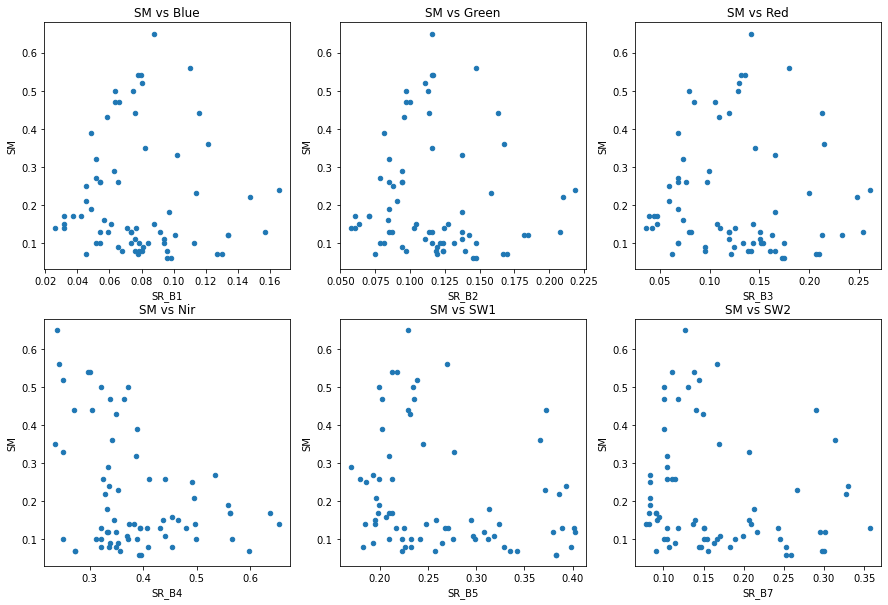

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

sm.plot(ax=axes[0,0],y ='SM', x='SR_B1', kind = 'scatter'); axes[0,0].set_title('SM vs Blue')
sm.plot(ax=axes[0,1],y ='SM', x='SR_B2', kind = 'scatter'); axes[0,1].set_title('SM vs Green')
sm.plot(ax=axes[0,2],y ='SM', x='SR_B3', kind = 'scatter'); axes[0,2].set_title('SM vs Red')
sm.plot(ax=axes[1,0],y ='SM', x='SR_B4', kind = 'scatter'); axes[1,0].set_title('SM vs Nir')
sm.plot(ax=axes[1,1],y ='SM', x='SR_B5', kind = 'scatter'); axes[1,1].set_title('SM vs SW1')
sm.plot(ax=axes[1,2],y ='SM', x='SR_B7', kind = 'scatter'); axes[1,2].set_title('SM vs SW2')

In the figure above, let's look for patterns (e.g. a linear trend). Which bands relate more to SM?. Let's look at the thermal information too.

Text(0.5, 1.0, 'SM vs Temp')

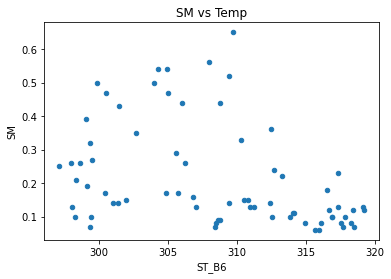

In [32]:
sm.plot(y ='SM', x='ST_B6', kind = 'scatter').set_title('SM vs Temp')


We can see that a) there is no a "linear" relationship between any band and soil moisture and b) In the plots "SM vs NIR", "SM vs Temp", "SM vs SW1" and "SM vs SW2" se "see" a sort of "triangle" shape. This last data behavoir is what created the original "Triangle Method" to estimate plant water use and soil moisture. Paper here: https://www.mdpi.com/1424-8220/7/8/1612 

Let's compare soil moisture against vegetation indices.

Text(0.5, 1.0, 'SM vs VARI')

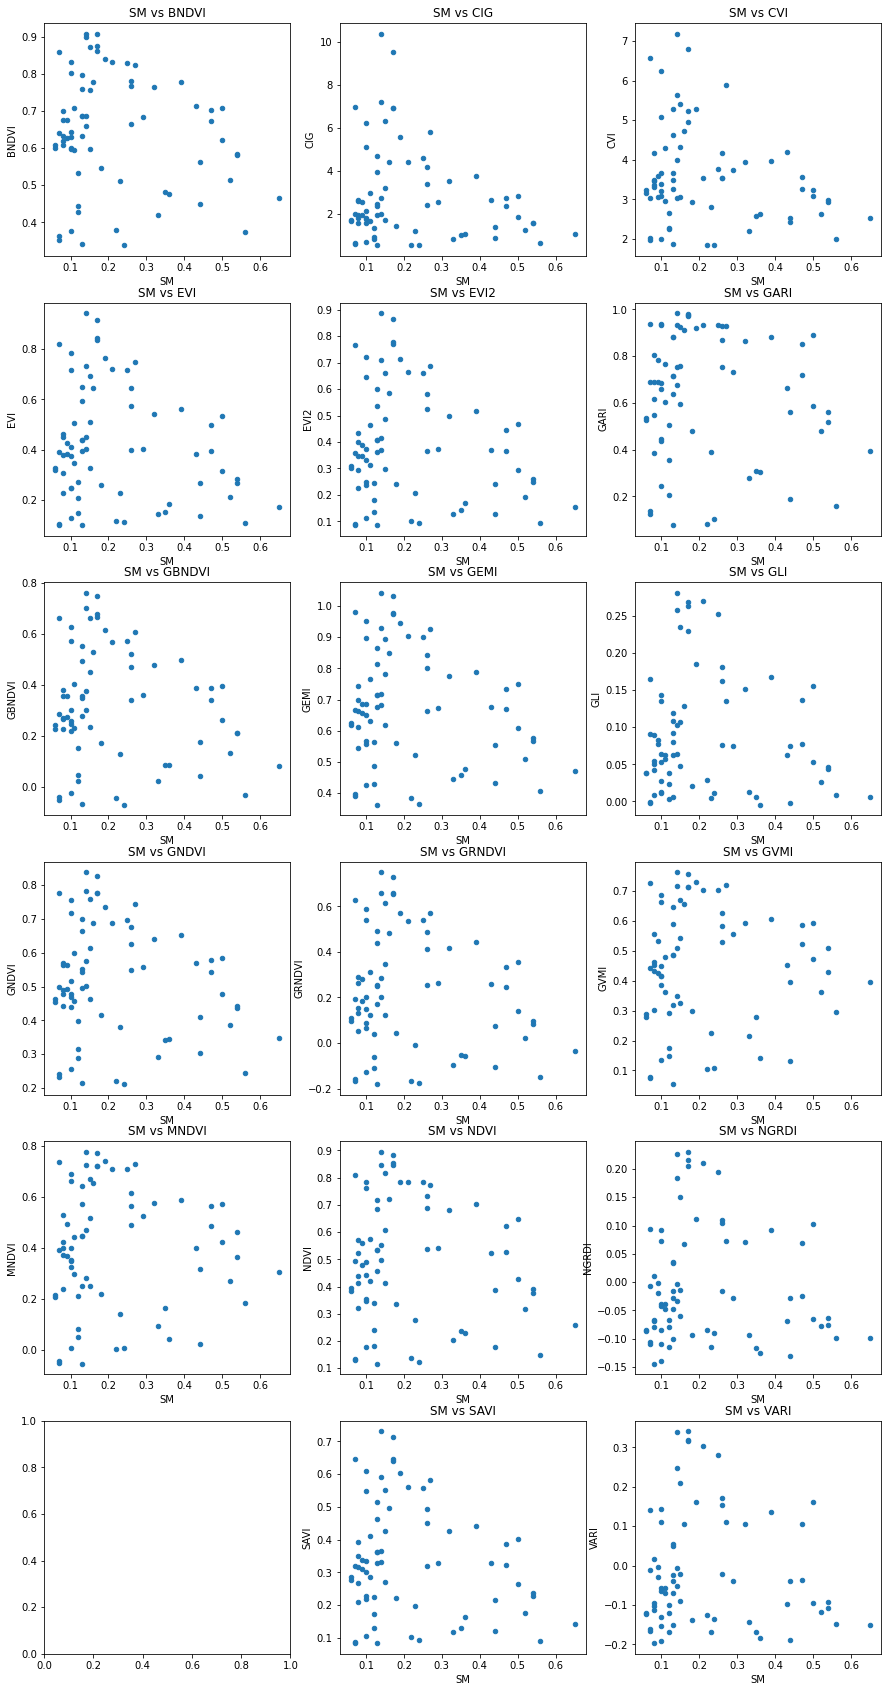

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(15,30))

sm.plot(ax=axes[0,0],x ='SM', y='BNDVI', kind = 'scatter'); axes[0,0].set_title('SM vs BNDVI')
sm.plot(ax=axes[0,1],x ='SM', y='CIG', kind = 'scatter'); axes[0,1].set_title('SM vs CIG')
sm.plot(ax=axes[0,2],x ='SM', y='CVI', kind = 'scatter'); axes[0,2].set_title('SM vs CVI')
sm.plot(ax=axes[1,0],x ='SM', y='EVI', kind = 'scatter'); axes[1,0].set_title('SM vs EVI')
sm.plot(ax=axes[1,1],x ='SM', y='EVI2', kind = 'scatter'); axes[1,1].set_title('SM vs EVI2')
sm.plot(ax=axes[1,2],x ='SM', y='GARI', kind = 'scatter'); axes[1,2].set_title('SM vs GARI')
sm.plot(ax=axes[2,0],x ='SM', y='GBNDVI', kind = 'scatter'); axes[2,0].set_title('SM vs GBNDVI')
sm.plot(ax=axes[2,1],x ='SM', y='GEMI', kind = 'scatter'); axes[2,1].set_title('SM vs GEMI')
sm.plot(ax=axes[2,2],x ='SM', y='GLI', kind = 'scatter'); axes[2,2].set_title('SM vs GLI')
sm.plot(ax=axes[3,0],x ='SM', y='GNDVI', kind = 'scatter'); axes[3,0].set_title('SM vs GNDVI')
sm.plot(ax=axes[3,1],x ='SM', y='GRNDVI', kind = 'scatter'); axes[3,1].set_title('SM vs GRNDVI')
sm.plot(ax=axes[3,2],x ='SM', y='GVMI', kind = 'scatter'); axes[3,2].set_title('SM vs GVMI')
sm.plot(ax=axes[4,0],x ='SM', y='MNDVI', kind = 'scatter'); axes[4,0].set_title('SM vs MNDVI')
sm.plot(ax=axes[4,1],x ='SM', y='NDVI', kind = 'scatter'); axes[4,1].set_title('SM vs NDVI')
sm.plot(ax=axes[4,2],x ='SM', y='NGRDI', kind = 'scatter'); axes[4,2].set_title('SM vs NGRDI')
# sm.plot(ax=axes[5,0],x ='SM', y='RVI', kind = 'scatter'); axes[5,0].set_title('SM vs RVI')
sm.plot(ax=axes[5,1],x ='SM', y='SAVI', kind = 'scatter'); axes[5,1].set_title('SM vs SAVI')
sm.plot(ax=axes[5,2],x ='SM', y='VARI', kind = 'scatter'); axes[5,2].set_title('SM vs VARI')

Comparing the rest of vegetation indices 

Text(0.5, 1.0, 'SM vs SAVIT')

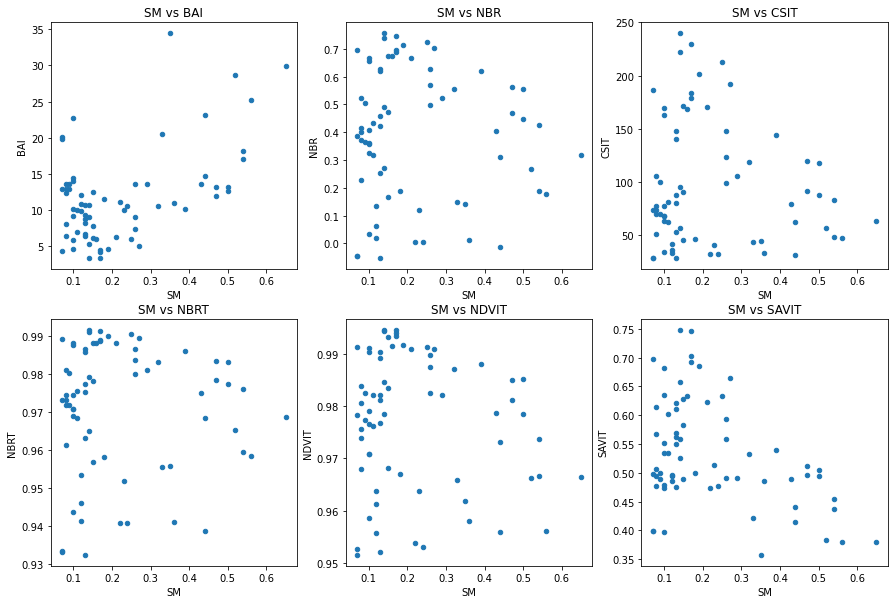

In [14]:
# burn =['BAI','NBR','CSIT','NBRT','NDVIT','SAVIT']
# water=['MNDWI','NDWI']
# snow=['NDSI']
# drought=['NDDI']
# kernel=['kEVI','kNDVI','kRVI','kVARI']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

sm.plot(ax=axes[0,0],x ='SM', y='BAI', kind = 'scatter'); axes[0,0].set_title('SM vs BAI')
sm.plot(ax=axes[0,1],x ='SM', y='NBR', kind = 'scatter'); axes[0,1].set_title('SM vs NBR')
sm.plot(ax=axes[0,2],x ='SM', y='CSIT', kind = 'scatter'); axes[0,2].set_title('SM vs CSIT')
sm.plot(ax=axes[1,0],x ='SM', y='NBRT', kind = 'scatter'); axes[1,0].set_title('SM vs NBRT')
sm.plot(ax=axes[1,1],x ='SM', y='NDVIT', kind = 'scatter'); axes[1,1].set_title('SM vs NDVIT')
sm.plot(ax=axes[1,2],x ='SM', y='SAVIT', kind = 'scatter'); axes[1,2].set_title('SM vs SAVIT')

Text(0.5, 1.0, 'SM vs NDDI')

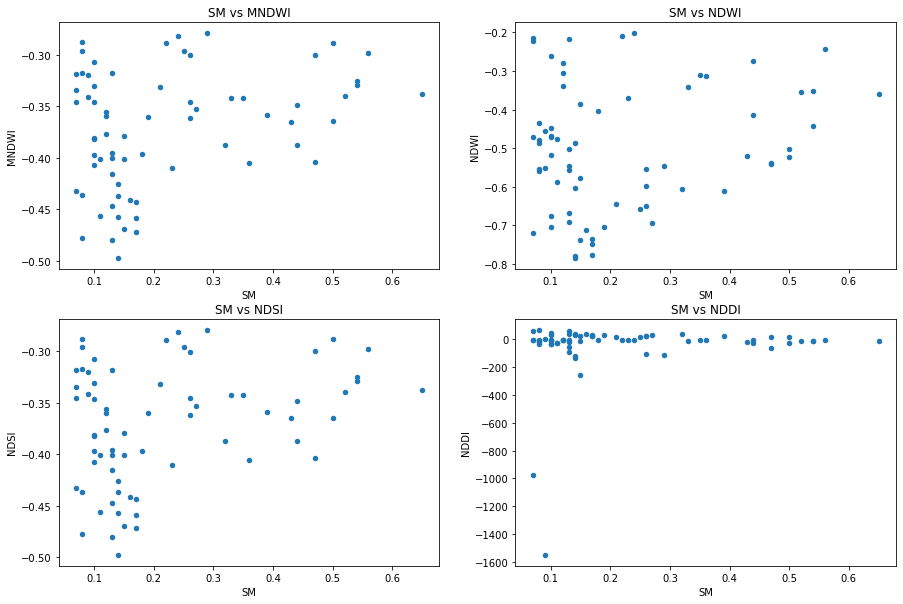

In [15]:
# water=['MNDWI','NDWI']
# snow=['NDSI']
# drought=['NDDI']
# kernel=['kEVI','kNDVI','kRVI','kVARI']

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sm.plot(ax=axes[0,0],x ='SM', y='MNDWI', kind = 'scatter'); axes[0,0].set_title('SM vs MNDWI')
sm.plot(ax=axes[0,1],x ='SM', y='NDWI', kind = 'scatter'); axes[0,1].set_title('SM vs NDWI')
sm.plot(ax=axes[1,0],x ='SM', y='NDSI', kind = 'scatter'); axes[1,0].set_title('SM vs NDSI')
sm.plot(ax=axes[1,1],x ='SM', y='NDDI', kind = 'scatter'); axes[1,1].set_title('SM vs NDDI')
# sm.plot(ax=axes[1,1],x ='SM', y='NDVIT', kind = 'scatter'); axes[1,1].set_title('SM vs NDVIT')
# sm.plot(ax=axes[1,2],x ='SM', y='SAVIT', kind = 'scatter'); axes[1,2].set_title('SM vs SAVIT')

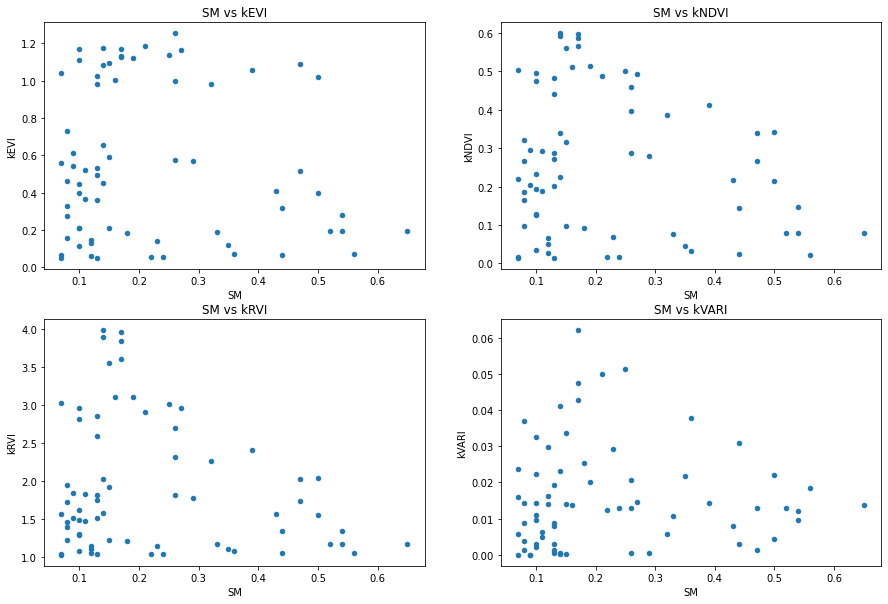

In [16]:
# kernel=['kEVI','kNDVI','kRVI','kVARI']
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
sm.plot(ax=axes[0,0],x ='SM', y='kEVI', kind = 'scatter'); axes[0,0].set_title('SM vs kEVI');
sm.plot(ax=axes[0,1],x ='SM', y='kNDVI', kind = 'scatter'); axes[0,1].set_title('SM vs kNDVI');
sm.plot(ax=axes[1,0],x ='SM', y='kRVI', kind = 'scatter'); axes[1,0].set_title('SM vs kRVI');
sm.plot(ax=axes[1,1],x ='SM', y='kVARI', kind = 'scatter'); axes[1,1].set_title('SM vs kVARI');


In [22]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

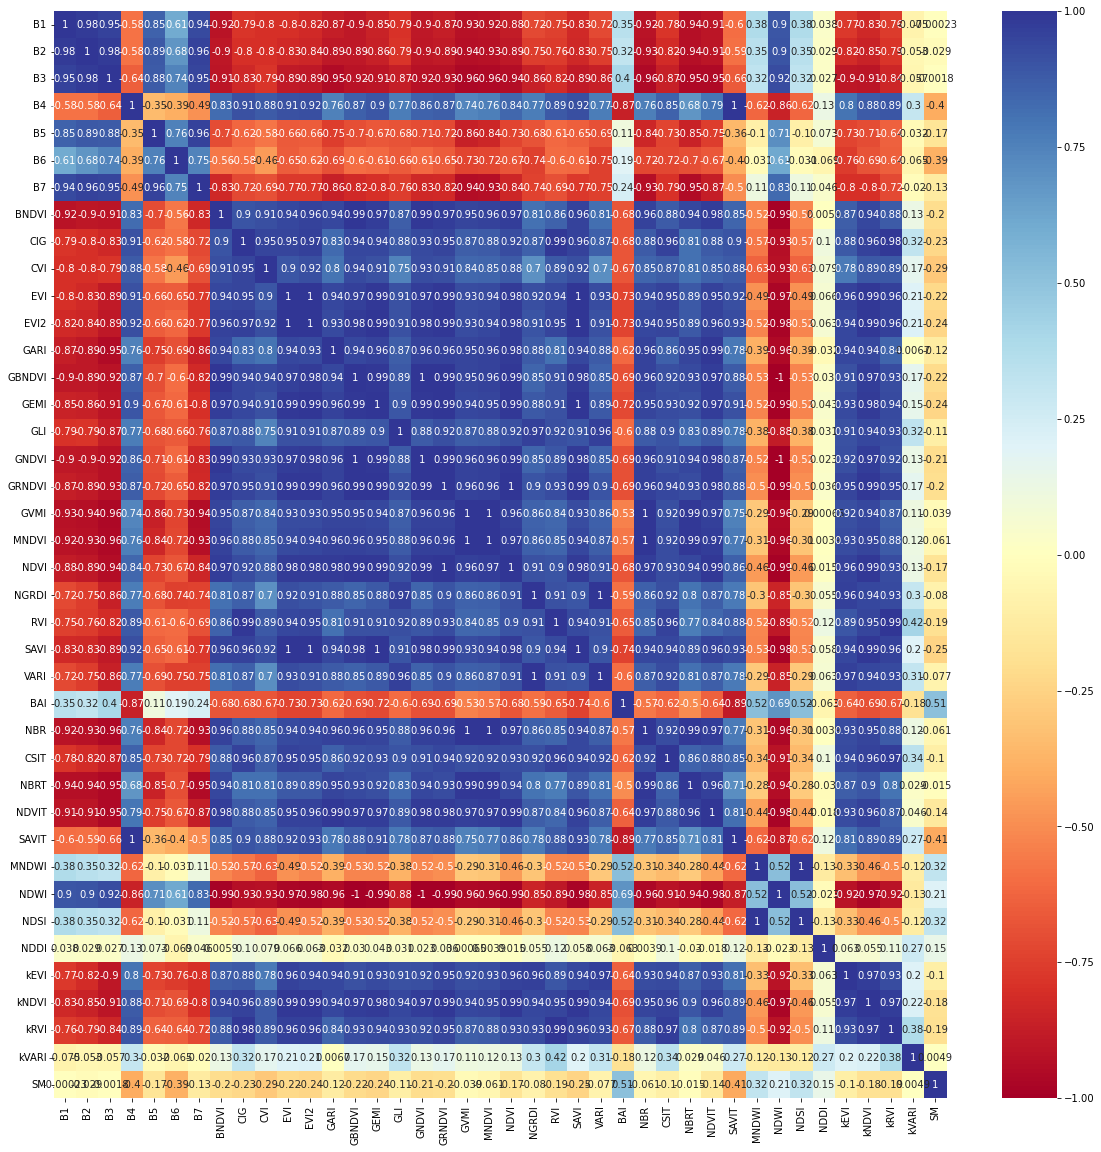

In [23]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(sm.corr(), annot=True, cmap="RdYlBu", ax=ax, vmin=-1, vmax=1)
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [24]:
# calculating the correlation seen in figure above
cor_matrix=sm.corr()
var_cor=cor_matrix[cor_matrix['SM']==1] # only for the SM row in figure
var_cor=var_cor.abs() #converting negative to positive values
var_cor

,B1,B2,B3,B4,B5,B6,B7,BNDVI,CIG,CVI,...,SAVIT,MNDWI,NDWI,NDSI,NDDI,kEVI,kNDVI,kRVI,kVARI,SM
SM,0.000225,0.028755,0.001774,0.402975,0.16763,0.388202,0.131784,0.204708,0.227659,0.289858,...,0.410702,0.315314,0.207414,0.315314,0.147649,0.10397,0.184991,0.189108,0.004882,1.0


<AxesSubplot:>

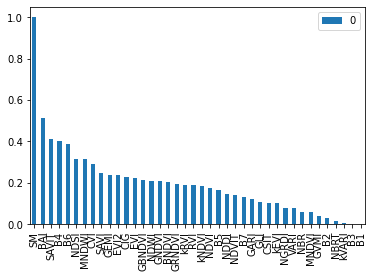

In [25]:
var_cor=pd.concat([sm,var_cor]) #concatenating the SM table
#sorting the table based in the absolute corrlation values.
var_cor_sorted=var_cor.sort_values(by=var_cor.index[-1],axis=1,ascending=False)
# var_cor_sorted
var_cor_sorted_values=var_cor_sorted[var_cor_sorted['SM']==1] # only for the SM row in figure
var_cor_sorted_values.reset_index(drop=True, inplace=True)
var_cor_sorted_values=var_cor_sorted_values.T
# var_cor_sorted_values
var_cor_sorted_values.plot.bar() # variables sorted by corrlation value (largest to smallest)


In [26]:
var_cor_sorted.head()

,SM,BAI,SAVIT,B4,B6,NDSI,MNDWI,CVI,SAVI,GEMI,...,NGRDI,VARI,NBR,MNDVI,GVMI,B2,NBRT,kVARI,B3,B1
0,0.39,10.113513,0.539735,0.3735,295.5,-0.358974,-0.358974,3.486000,0.411152,0.757530,...,0.086957,0.142012,0.618986,0.618986,0.628827,0.0900,0.986187,0.014440,0.0756,0.0642
1,0.32,10.595909,0.532088,0.3666,296.0,-0.387547,-0.387547,3.652422,0.395080,0.741872,...,0.054482,0.089423,0.556688,0.556688,0.579019,0.0900,0.983282,0.005706,0.0807,0.0667
2,0.50,12.580357,0.504472,0.3416,296.5,-0.288564,-0.288564,2.571921,0.357753,0.702719,...,0.107660,0.176122,0.555556,0.555556,0.579399,0.1070,0.983199,0.022106,0.0862,0.0751
3,0.47,11.995843,0.511969,0.3485,297.0,-0.300235,-0.300235,2.838363,0.361701,0.707913,...,0.081389,0.139061,0.562430,0.562430,0.584526,0.1043,0.983502,0.012890,0.0886,0.0800
4,0.07,20.168927,0.399352,0.2589,313.6,-0.318784,-0.318784,1.857574,0.080603,0.391713,...,-0.090166,-0.140731,-0.047286,-0.047286,0.081839,0.1670,0.933352,0.015952,0.2001,0.1319


In [27]:
sma=var_cor_sorted[var_cor_sorted["SM"]!=1] #dropping the covariance 
sma#.head()

,SM,BAI,SAVIT,B4,B6,NDSI,MNDWI,CVI,SAVI,GEMI,...,NGRDI,VARI,NBR,MNDVI,GVMI,B2,NBRT,kVARI,B3,B1
0,0.39,10.113513,0.539735,0.3735,295.5,-0.358974,-0.358974,3.486000,0.411152,0.757530,...,0.086957,0.142012,0.618986,0.618986,0.628827,0.0900,0.986187,0.014440,0.0756,0.0642
1,0.32,10.595909,0.532088,0.3666,296.0,-0.387547,-0.387547,3.652422,0.395080,0.741872,...,0.054482,0.089423,0.556688,0.556688,0.579019,0.0900,0.983282,0.005706,0.0807,0.0667
2,0.50,12.580357,0.504472,0.3416,296.5,-0.288564,-0.288564,2.571921,0.357753,0.702719,...,0.107660,0.176122,0.555556,0.555556,0.579399,0.1070,0.983199,0.022106,0.0862,0.0751
3,0.47,11.995843,0.511969,0.3485,297.0,-0.300235,-0.300235,2.838363,0.361701,0.707913,...,0.081389,0.139061,0.562430,0.562430,0.584526,0.1043,0.983502,0.012890,0.0886,0.0800
4,0.07,20.168927,0.399352,0.2589,313.6,-0.318784,-0.318784,1.857574,0.080603,0.391713,...,-0.090166,-0.140731,-0.047286,-0.047286,0.081839,0.1670,0.933352,0.015952,0.2001,0.1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.17,4.199442,0.703307,0.5458,303.9,-0.471952,-0.471952,4.761866,0.614990,0.954561,...,0.186415,0.280045,0.696085,0.696085,0.691461,0.0786,0.989168,0.062334,0.0539,0.0443
16,0.11,6.985466,0.601447,0.4374,311.4,-0.456553,-0.456553,4.331592,0.396983,0.750485,...,-0.057060,-0.084516,0.431751,0.431751,0.470315,0.1132,0.975583,0.006129,0.1269,0.0780
17,0.08,6.468516,0.613699,0.4510,311.8,-0.436736,-0.436736,3.826251,0.388847,0.740694,...,-0.045471,-0.066343,0.414236,0.414236,0.454210,0.1291,0.974500,0.003832,0.1414,0.0851
18,0.16,5.969022,0.633905,0.4679,303.9,-0.441563,-0.441563,5.006214,0.523859,0.871989,...,0.086386,0.130753,0.673761,0.673761,0.672508,0.0786,0.988223,0.013636,0.0661,0.0491


Now we have a cleaned, sorted by correlation table we can use for regression.Let's save it so in the next notebook we can start applying machine learning.

In [28]:
import os
# defining directory for storing results
out_dir = os.path.join(os.path.expanduser('~'), 'git_repos/nsf_dsaw_application_1/Results Step 2/')
out_dir

'/home/jovyan/data/git_repos/nsf_dsaw_application_1/Results Step 2/'

In [29]:
filename=os.path.join(out_dir,'machine_learning_data.csv')
sma.to_csv(filename, index=False)